# Seaborn - Visualizing Statistical Relationships
Growth Hackers 2019-2 시각화 스터디 전반부
- 참여자: 이경 찬영 현영
- 기간: 2019/09/17 ~ 09/28
- 참고: seaborn 공식 튜토리얼 https://seaborn.pydata.org/tutorial/relational.html

### figure-level function vs axis-level function  
- Figure: The top level container for all the plot elements. 스케치북에 해당.
- Axes: The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system. 좌표계를 담당, 시스템을 설정하니까 관련 function이 많다.  

## Scatter Plot

### basics
- They plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using __the semantics of hue, size, and style__.
- size: continuous
- hue: continuous/categorical
- style: cateogorical

### scatter vs line
- you may want to understand changes in one variable as a function of time, or a similarly continuous variable
- scatter는 각 row가 상관 없는 별개의 경우, line은 연속성, 여러개의 row가 다른 경우
- 특히 line은 연속성, 변화 묘사하기: x축이 시간적 속성을 가지고 있는 경우가 대부분. 다른 경우 또 있을까? 시간에 따른 변화 보려는 경우가 많다. 하나의 attribute을 시간 순 흐름을 추적

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### relplot 기본 형태
`sns.replot(x="x축에 해당하는 column이름", y="y축에 해당하는 column이름", data=dataframe변수명)`

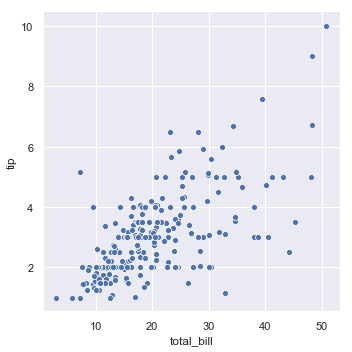

In [5]:
sns.relplot(x="total_bill", y="tip", data=tips);

### sematic 추가하기
- categorical / numeric 종류에 따라 자동 적용
- 예를 들면 hue의 경우 categorical column(=can not be cast to float)이면 qualitative palette가 자동으로 적용됨
- 아래처럼 smoker라는 걸 색깔로만 달리하면 잘 안보이고, accessibility에도 문제가 있으니까 hue, style 두 개의 cue를 활용해 표시하는 걸 권장

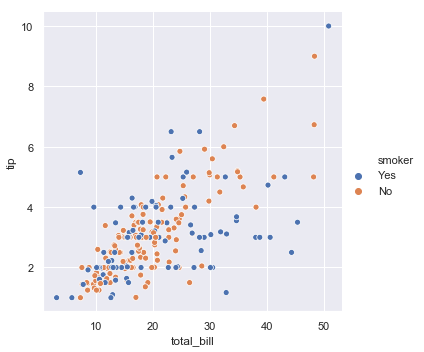

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

### 주의
- categorical 변수의 level 종류가 일곱개나 되면 매치하기가 힘들다
- shape은 color보다 구분하기 힘들다. The eye is much less sensitive to shape than to color!

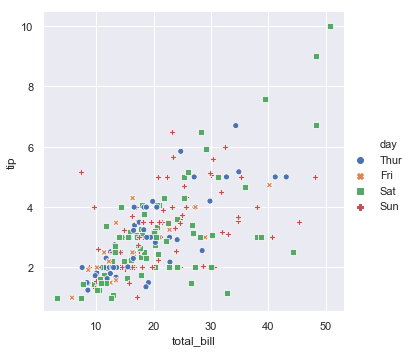

In [4]:
sns.relplot(x="total_bill", y="tip", hue="day", style="day", data=tips)

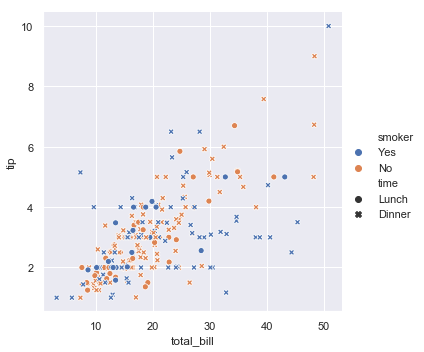

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

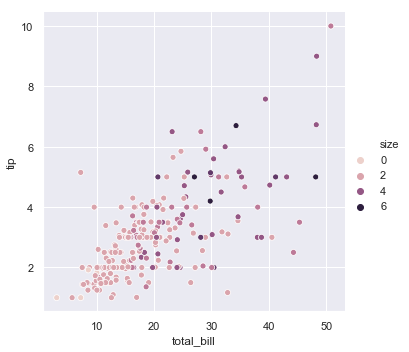

In [9]:
# size가 numeric column(=can be cast to float)이면 자동으로 sequential palette를 적용해줌
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

Unlike with matplotlib.pyplot.scatter(), the literal value of the variable is not used to pick the area of the point. 
Instead, the range of values in data units is normalized into a range in area units. 
This range can be customized

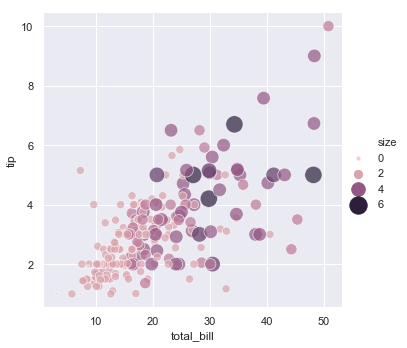

In [20]:
# 사이즈를 10~300으로 cast해 준 방법
# 0, 2, 4, 6 등이 실제 데이터프레임의 값이며, 이것이 10~300 사이 값으로 interpolate 되어 size/hue를 조정한다
sns.relplot(x="total_bill", y="tip", size="size", hue="size", sizes=(10, 300), data=tips, alpha=0.7);

### figure 비율/사이즈를 바꾸려는 노력들
결론
- `height`: 인치로 표현한 높이  e.g. 6
- `aspect`: 높이에 대한 너비의 비율 e.g. 가로로 긴 figure를 그리려면 1.5  
  
을 활용할 것  

In [21]:
# # 비율을 바꿔보려는 노력: 실패

# sns.set(rc={'figure.figsize':(18,6)})

# from matplotlib import rcParams

# # figure size in inches
# rcParams['figure.figsize']

[18.0, 6.0]

<Figure size 864x432 with 0 Axes>

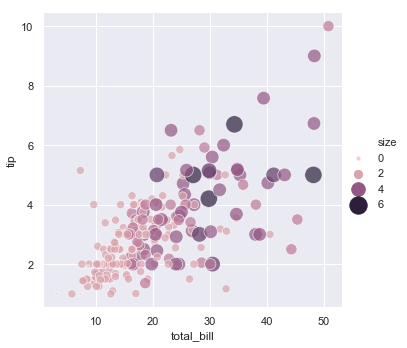

In [22]:
# # 비율을 바꿔보려는 노력2: 실패

# plt.figure(figsize=(12,6))
# sns.relplot(x="total_bill", y="tip", size="size", hue="size", sizes=(10, 300), data=tips, alpha=0.7)

AttributeError: Unknown property width_ratios

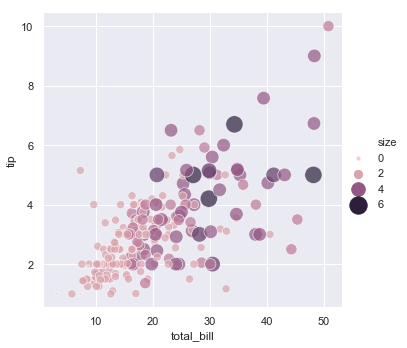

In [30]:
# # 비율을 바꿔보려는 노력3: 실패
g = sns.relplot(x="total_bill", y="tip", size="size", hue="size", sizes=(10, 300), data=tips, alpha=0.7)
sns.FacetGrid.set(g, width_ratios=3)
# https://seaborn.pydata.org/tutorial/axis_grids.html

# g.fig.set_size_inches(12,8)

## Line plot
* Line graph x 축에 들어갈 수 있는 time 말고 continuous variable 있으면 알려주기  
* 1차, 2차, 3차 시험: 불연속적인 시간

In [31]:
# x축에 들어갈 시간 만들기
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,-0.871153
1,1,-0.547751
2,2,-0.962419
3,3,-0.132857
4,4,0.107594


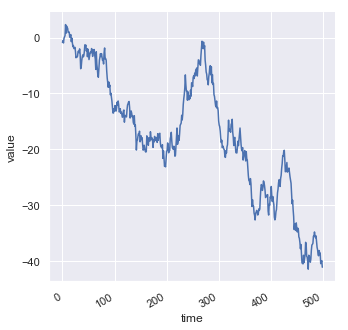

In [41]:
# Date ticklabels often overlap, so it is useful to rotate them and right align them
# 날짜는 스트링이 길어서 겹칠 수 있으니까
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [3]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [51]:
# timepoint가 빠지지 않고 골고루 있는지 확인
np.sort(fmri.timepoint.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [48]:
# timepoint의 count가 골고루 있는지 확인
fmri.timepoint.value_counts()

18    56
8     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
9     56
17    56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
0     56
Name: timepoint, dtype: int64

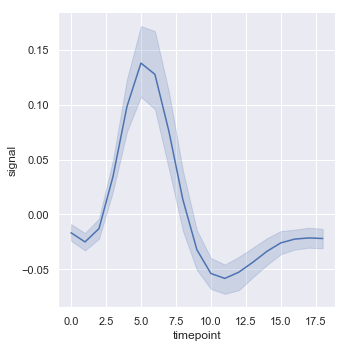

In [52]:
# 선은 mean(point estimate), 영역은 bootstrapping을 통해 도출한 confidence intervals(interval estimation)
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

### Confidence Interval by Bootstrapping
https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf  
- 부트스트랩이란 샘플 데이터를 empirical distribution으로 놓고 여기에서 resample을 하는 것
- 그렇게 알게 된 F\* 이 F에 근사한다는 것이 밝혀졌다
- 즉 위 파란색 영역은 우리가 가지고 있는 데이터에서 resample을 한 결과
  
#### idea
- EDA 할 때 꼭 그려봐야하는 그래프 10선!
- 분석 전에 꼭 그려봐야할 그래프!

## Plotting subsets of data with semantic mappings
https://seaborn.pydata.org/tutorial/relational.html#plotting-subsets-of-data-with-semantic-mappings

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [24]:
fmri = sns.load_dataset("fmri")

In [4]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


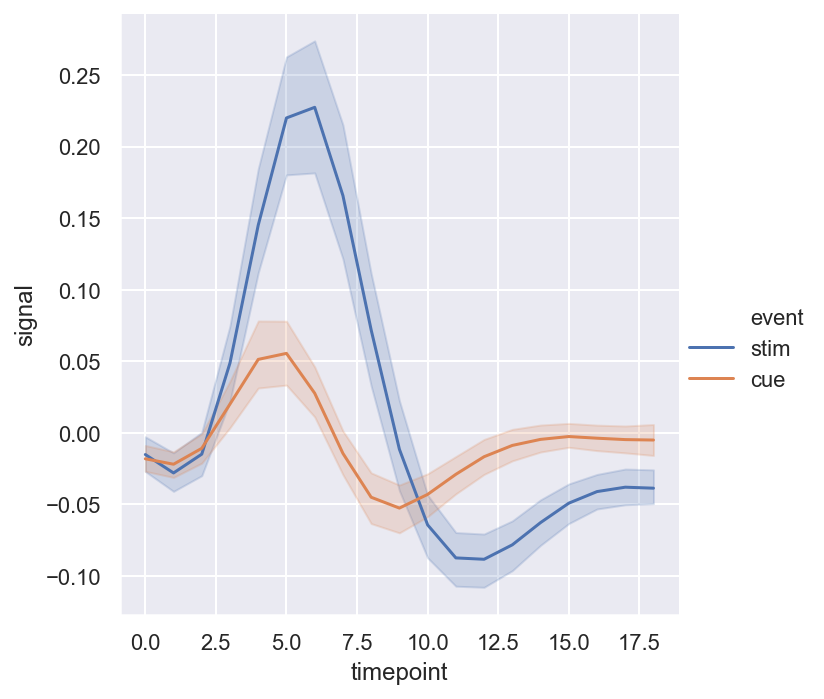

In [5]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

In [6]:
fmri.region.value_counts()

frontal     532
parietal    532
Name: region, dtype: int64

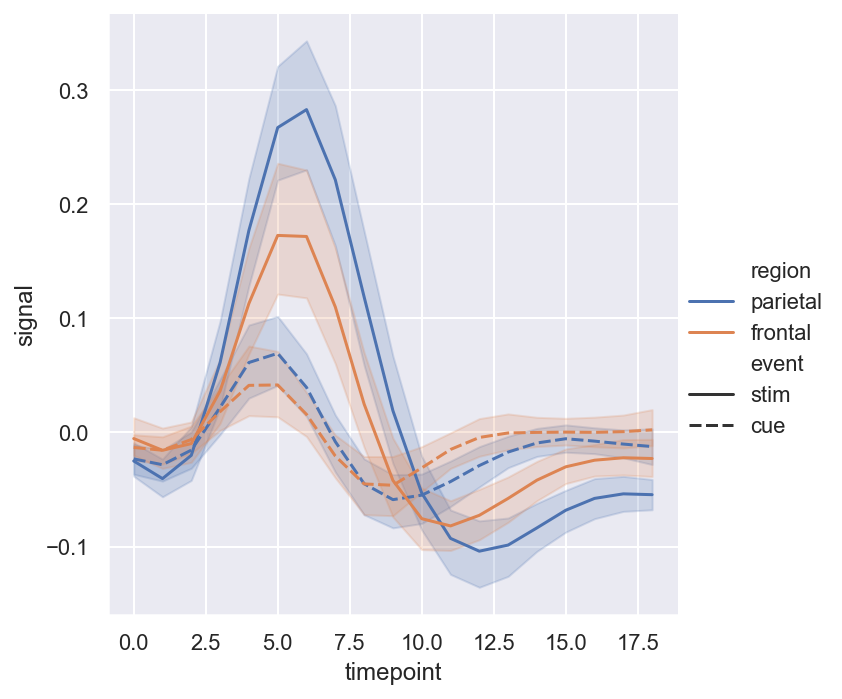

In [7]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",kind="line", data=fmri);

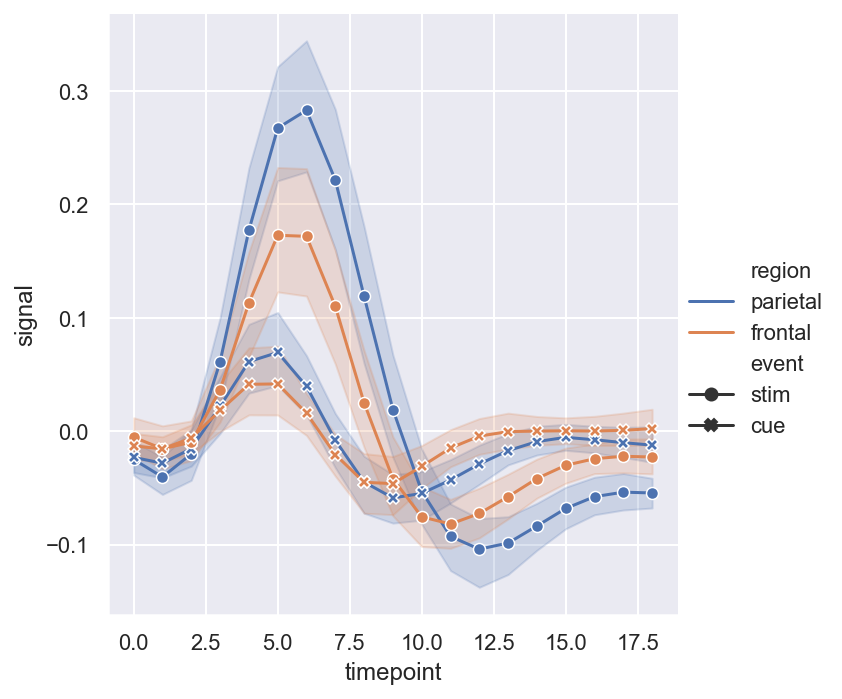

In [8]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri)
# 이건 별로인듯, 아예 style-dash로 구분하는 게 효과적

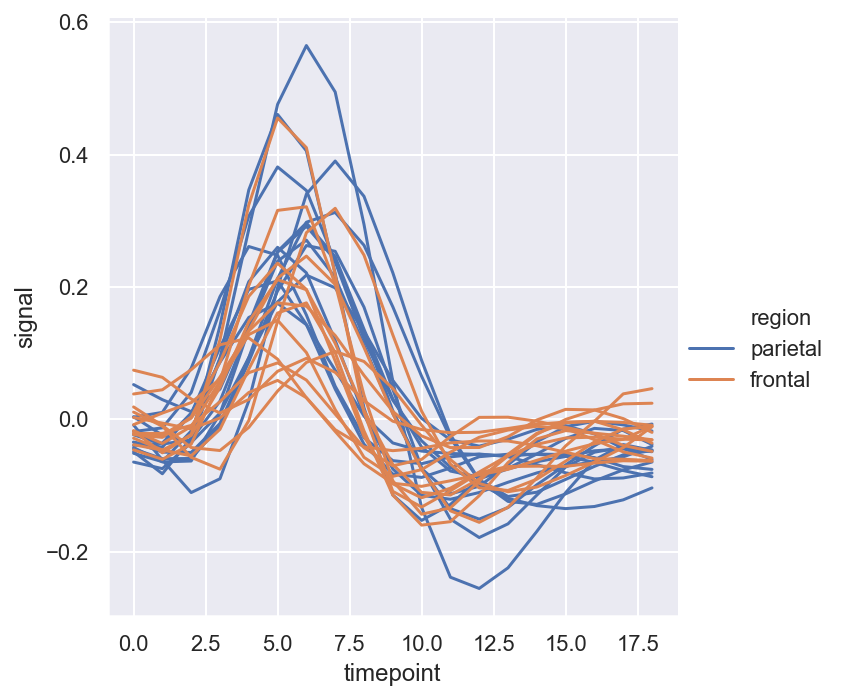

In [9]:
# units = 어떤 칼럼으로 나눠서 하나의 line으로 표현할 것인지
# units을 쓸꺼면 estimator = None으로해줘야(estimator must be None when specifying units)
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator = None,
            kind="line", data=fmri.query("event == 'stim'"))

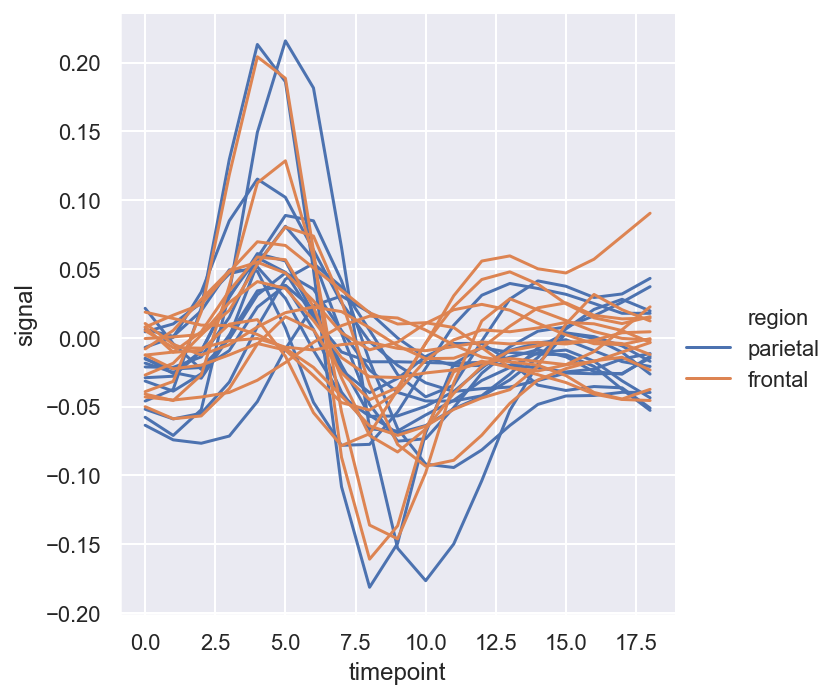

In [10]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator = None,
            kind="line", data=fmri.query("event == 'cue'"))

In [11]:
fmri.query('subject=="s13"').sort_values(by=['timepoint']) # 하나의 subject, 하나의 region에 대해서 datapoint 한 개 존재

,subject,timepoint,event,region,signal
676,s13,0,cue,parietal,-0.018394
279,s13,0,stim,frontal,-0.038266
252,s13,0,stim,parietal,-0.042467
625,s13,0,cue,frontal,-0.012576
238,s13,1,stim,parietal,-0.064256
...,...,...,...,...,...
15,s13,17,stim,parietal,-0.008265
815,s13,18,cue,parietal,-0.020816
708,s13,18,cue,frontal,-0.012163
522,s13,18,stim,frontal,0.024425


### query()
참고
- 공식문서: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
- high performance pandas: https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html  
  
As of version 0.13 (released January 2014), Pandas includes some experimental tools that allow you to directly access C-speed operations without costly allocation of intermediate arrays. These are the eval() and query() functions, which rely on the Numexpr package  
- memory use 가 더 효율적이다
- 속도는 작은 데이터에 대해서는 traditional한 방법이 더 낫다
- 문법이 깔끔하다

`fmri[fmri['event']=='stim']`: pure python  
`fmri.loc[fmri['event']=='stim']`: pandas  
`fmri.query("event == 'stim'")`: query문을 스트링 형태로 parameter로 전달

In [12]:
fmri.query("event == 'stim'").head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [13]:
fmri.loc[fmri['event']=='stim'].head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


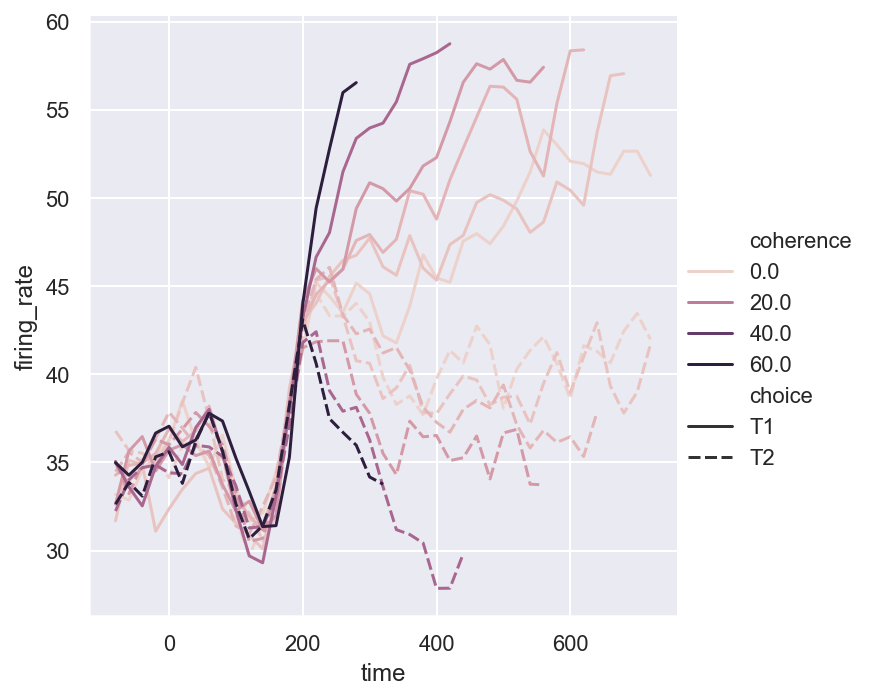

In [14]:
# hue semantic이 categorical하지 않고 numeric할때
# legend에는 그냥 중간 구간만 표시되어 있다. 실제 line은 linear하게 변화하고 있음
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

In [15]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [16]:
dots.coherence.describe()

count    394.000000
mean      12.621320
std       15.254508
min        0.000000
25%        3.200000
50%        6.400000
75%       12.800000
max       51.200000
Name: coherence, dtype: float64

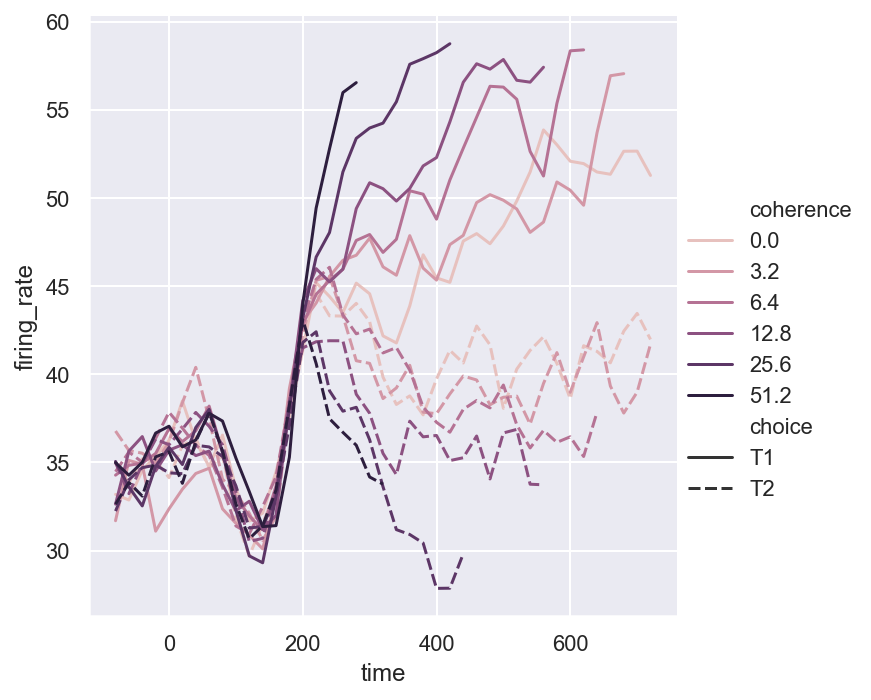

In [17]:
# light는 색 관련 옵션, n_colors 옵션은 답정너 6개
# cubehelix_palette: https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html
palette = sns.cubehelix_palette(light=.8)

dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice", palette=palette,
            kind="line", data=dots);

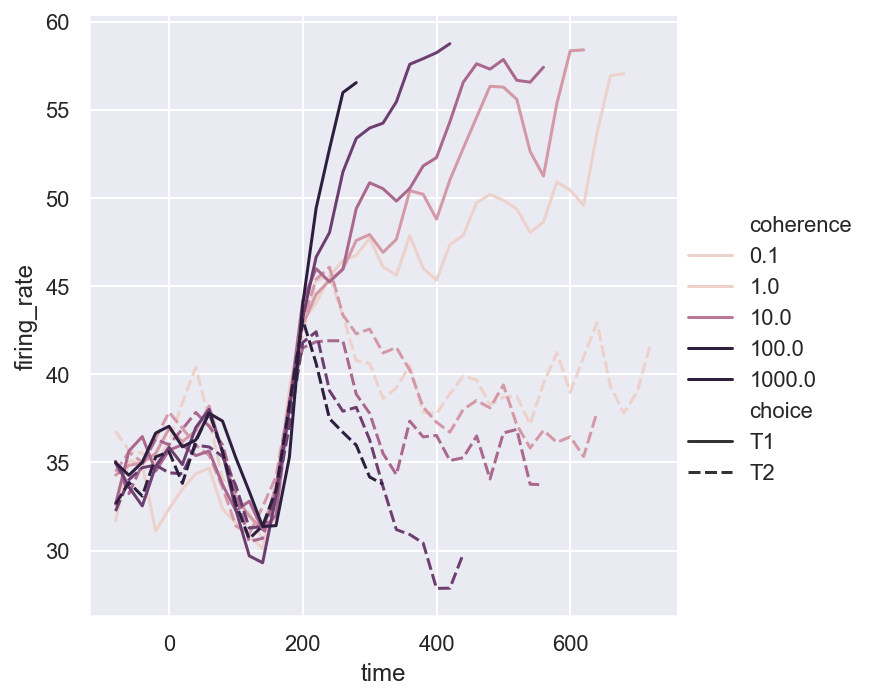

In [18]:
# 안쓸듯
# logNorm 공식문서: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.LogNorm.html
# line 하나가 사라졌는데 coherence가 0 일때 log0은 없으니까 사라진듯
# 레전드 값도 바뀜
from matplotlib.colors import LogNorm

sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

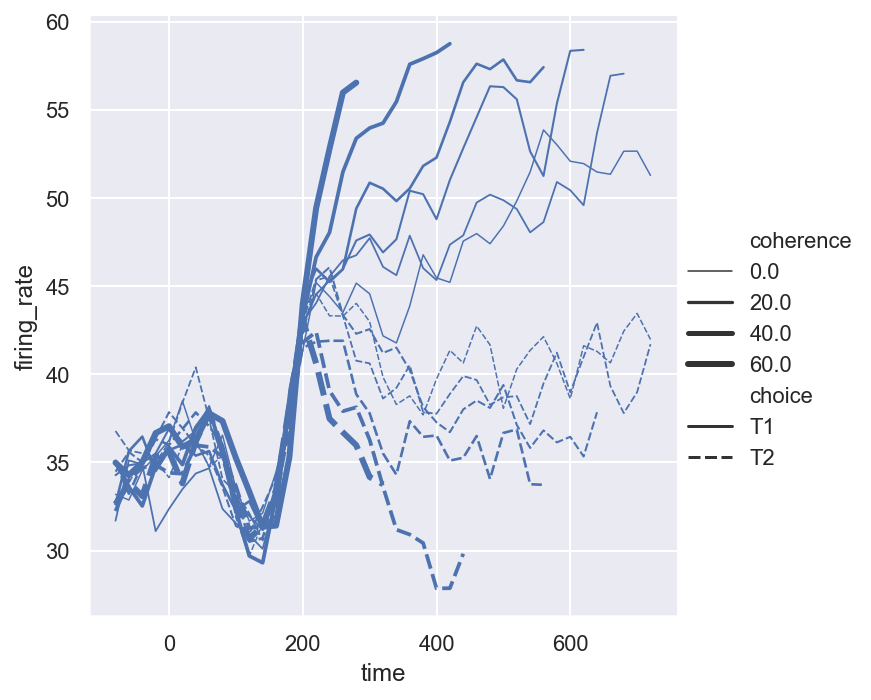

In [19]:
#size:그래프의 넓이 조정
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

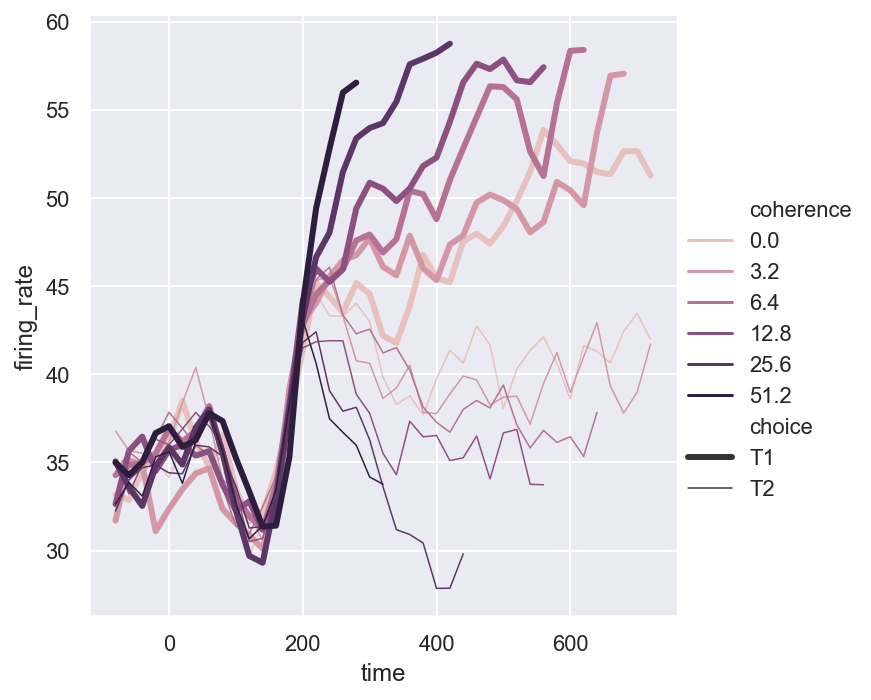

In [20]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


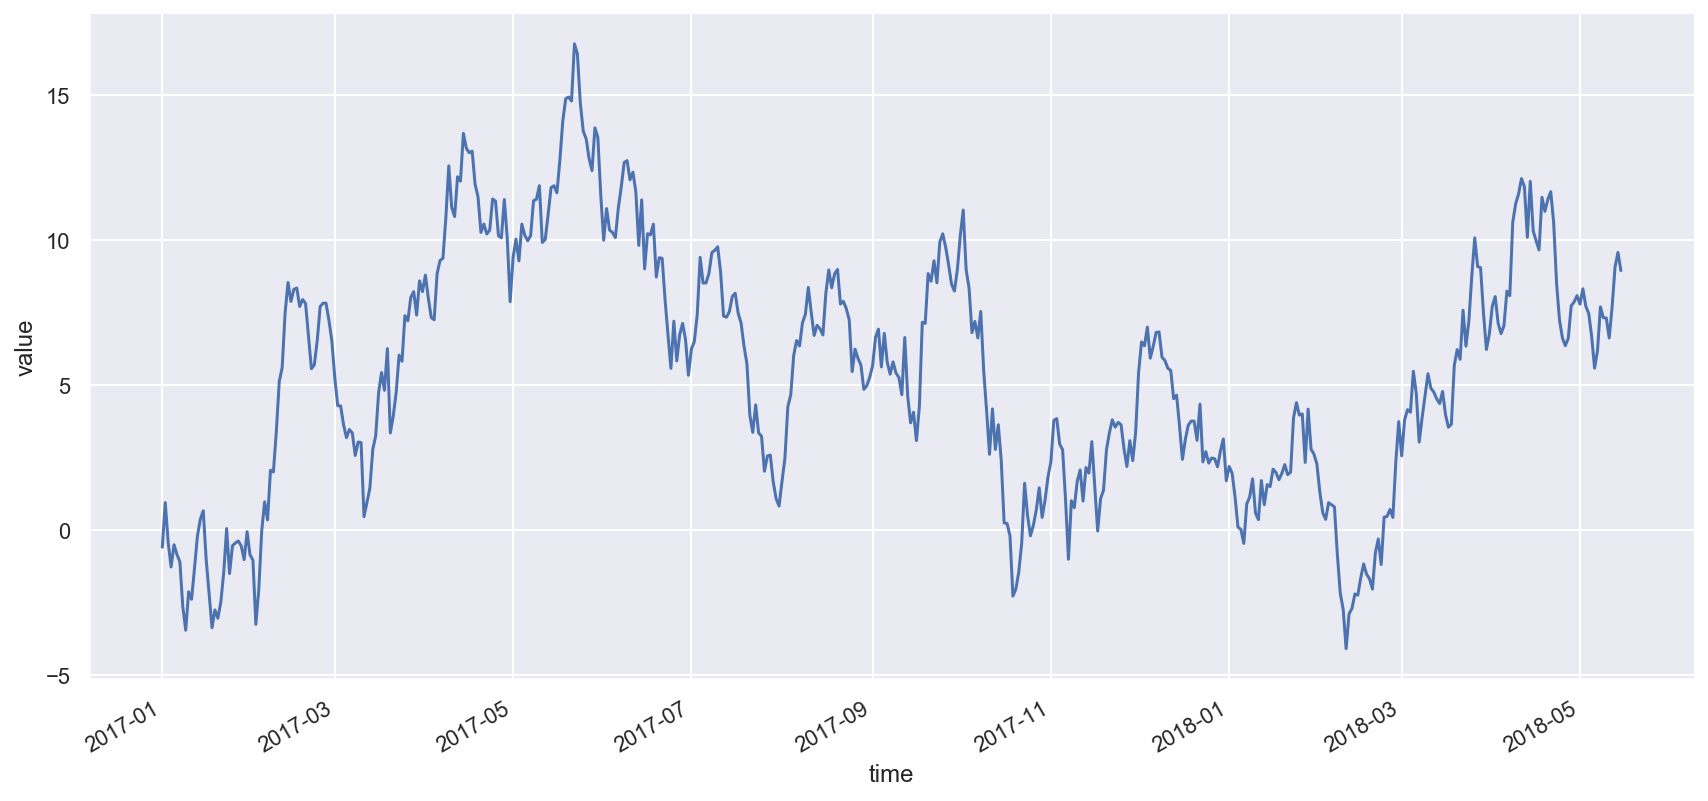

In [21]:
# height: 인치로 표현한 높이, apsect는 height 대비 width의 비율
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", height = 6, aspect = 2, data=df)
g.fig.autofmt_xdate()

## Multiple Relationships
https://seaborn.pydata.org/tutorial/relational.html#showing-multiple-relationships-with-facets
- matplotlib의 subplot은 변수별로 column이나 row가 구분되지 않아도 되며, 좀 더 자율성이 보장되는 형태라면, relplot에서 row와 col을 이용하는 방법은 보다 직관적.
- matplotlib에서 subplot을 그리려면 각 subplot에 맞는 형태로 데이터 가공이 필요하지만, replot에서 row/col을 활용하면 원데이터프레임 그대로 쓸 수 있따.

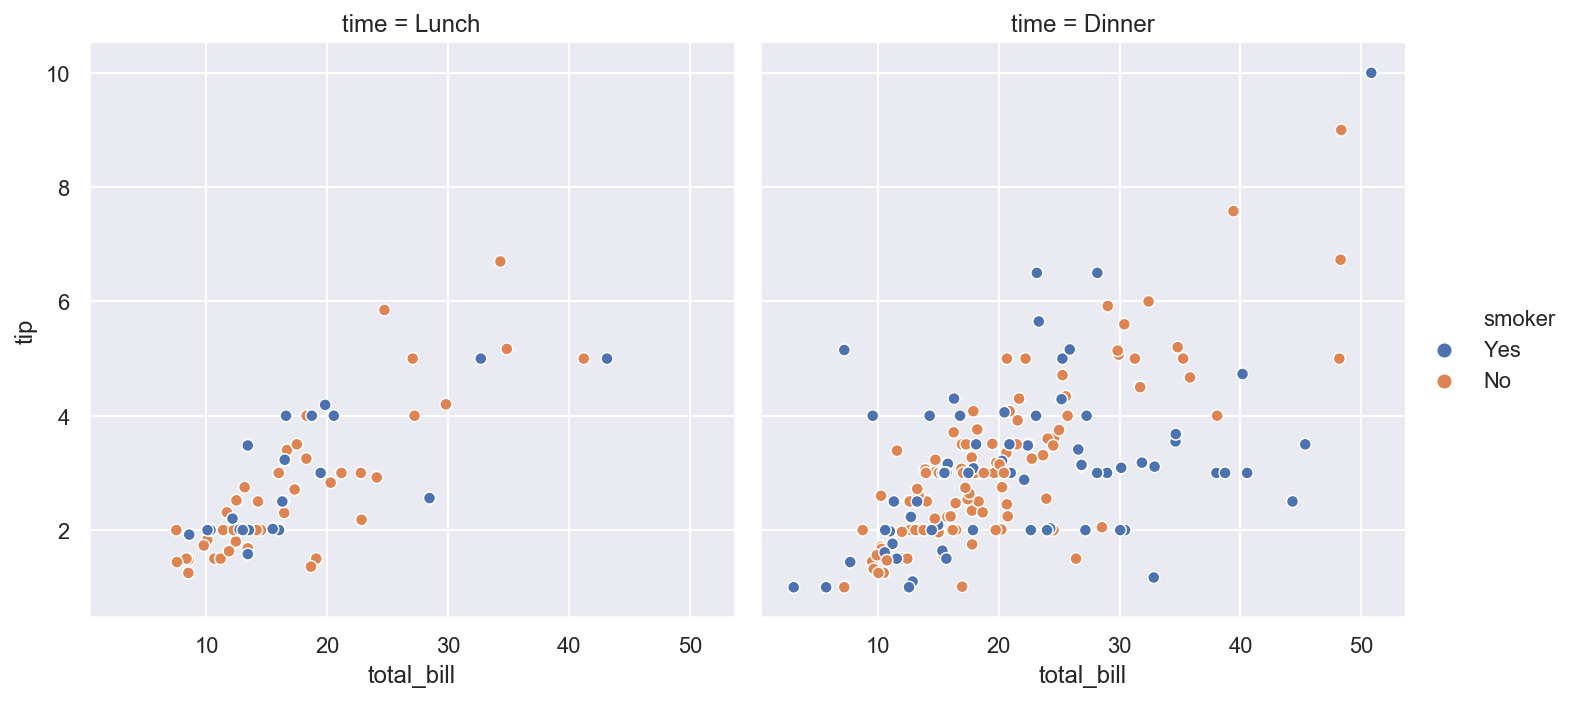

In [25]:
tips = sns.load_dataset("tips")

# col = facetgrid에서 column으로 쓸 변수 명
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

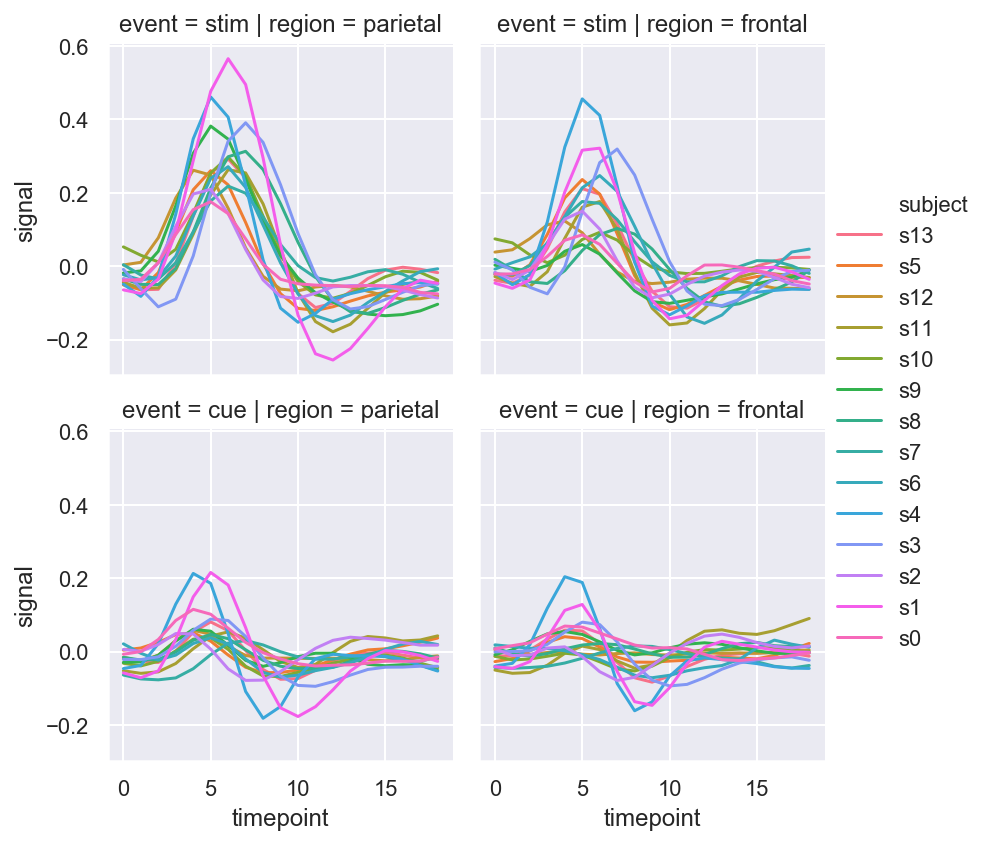

In [26]:
#row와 column 각각에 facet 설정
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

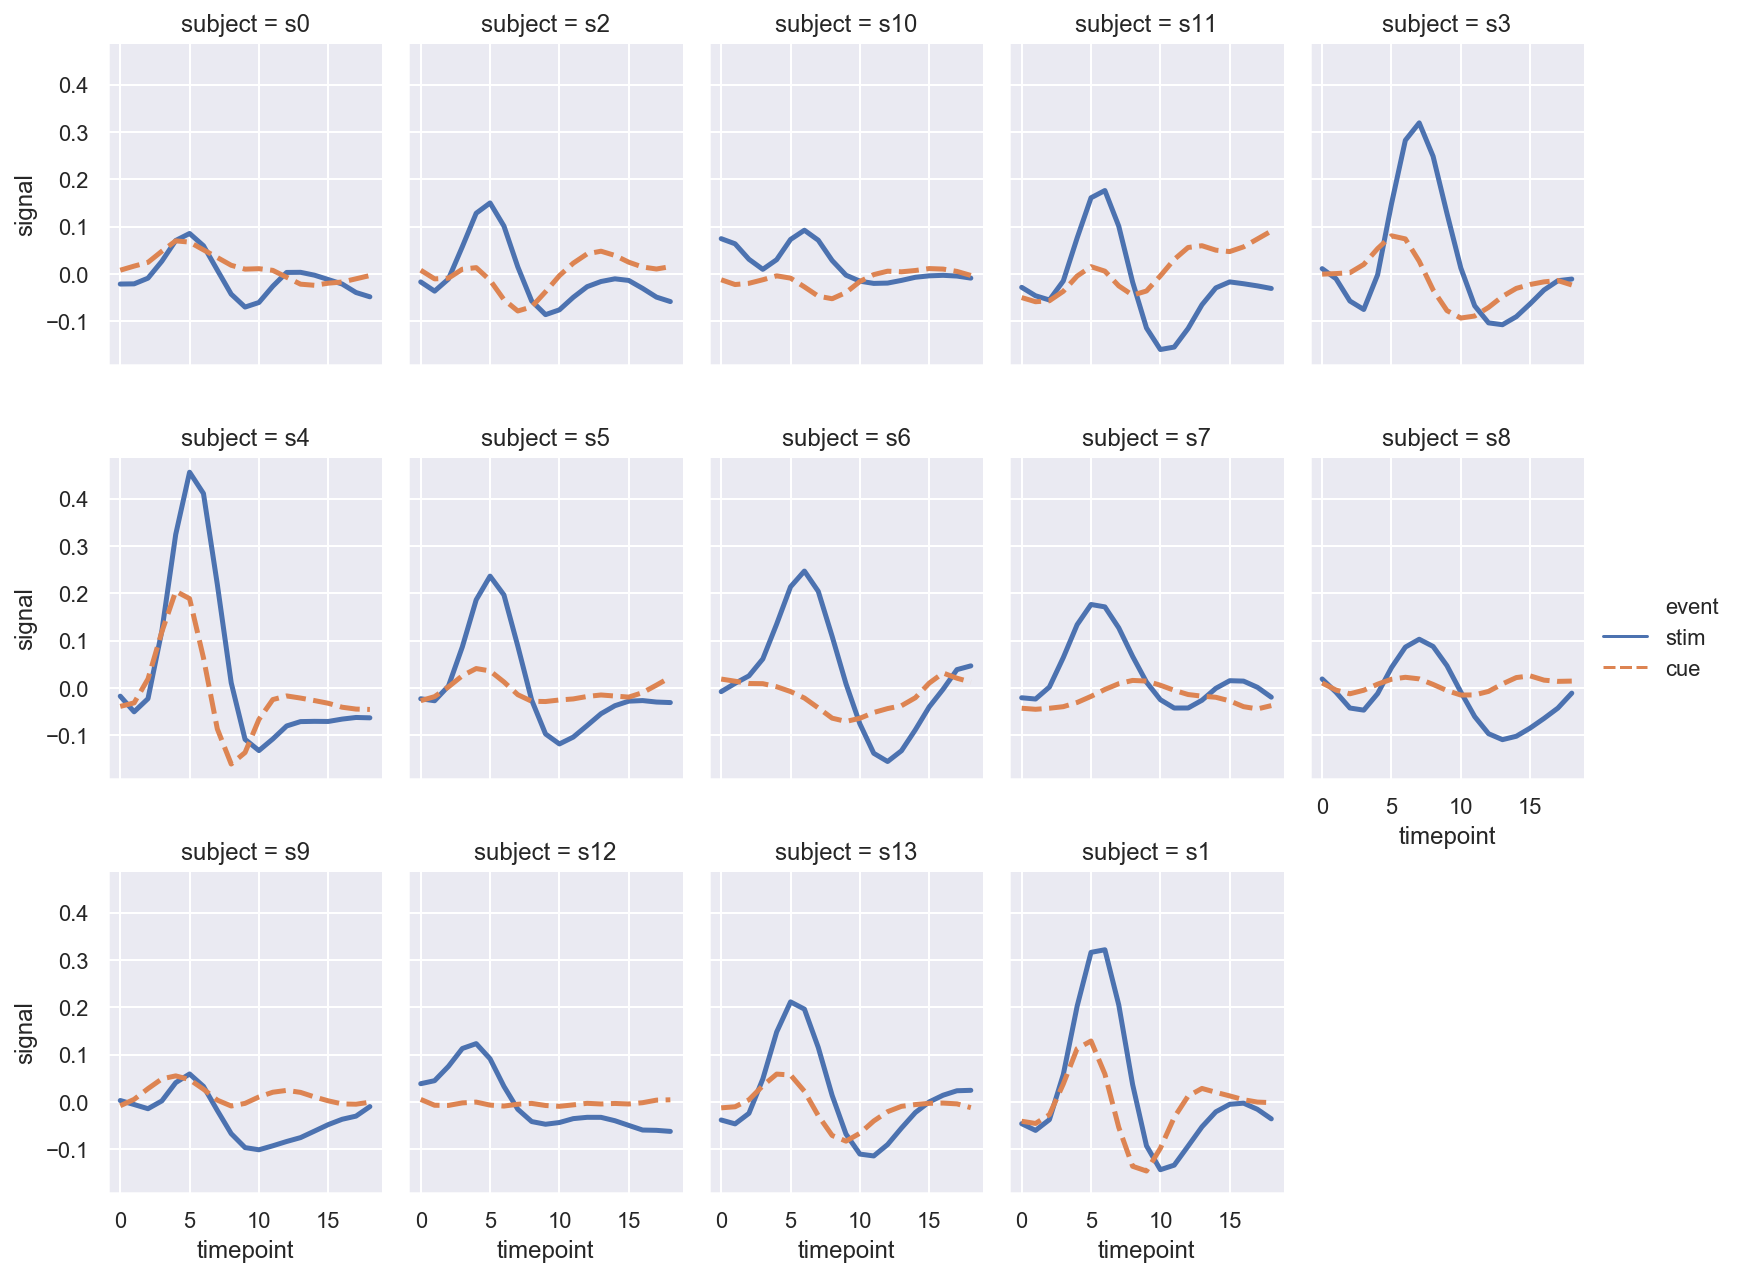

In [27]:
# 하나의 변수에 level혹은 category가 두세개 보다 많을 때
# col_wrap = 하나의 row에 몇개의 column을 담을래?
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));